In [1]:
import sys  
sys.path.insert(0, '../../data')
sys.path.insert(0, '../../data/description')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
raw_data = pd.read_csv("../../data/audio_features_data.tsv", delimiter='\t')
raw_data = raw_data.set_index(['id']).reset_index() #bring id column to front
raw_data.head()

,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,2dLLR6qlu5UJ5gk0dKz0h3,0.674,0.428,7,-9.504,1,0.1220,0.12100,0.000000,0.1320,0.337,84.878,190185,4,art pop
1,5PUvinSo4MNqW7vmomGRS7,0.861,0.504,7,-7.707,1,0.0489,0.00412,0.000018,0.0783,0.881,120.000,263053,4,contemporary r&b
2,6CjtS2JZH9RkDz5UVInsa9,0.781,0.526,6,-6.986,0,0.2930,0.06330,0.000000,0.0457,0.665,94.993,235613,4,dance pop
3,2Foc5Q5nqNiosCNqttzHof,0.794,0.811,6,-8.966,0,0.0380,0.04260,0.000001,0.1010,0.862,116.047,248413,4,electro
4,2bYZxKw8wv9lGQjcskPRl3,0.537,0.569,5,-8.046,1,0.3000,0.85500,0.000000,0.0909,0.524,78.907,135385,4,sad rap


### I. Dataset Description:

In [18]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2230 non-null   object 
 1   danceability      2230 non-null   float64
 2   energy            2230 non-null   float64
 3   key               2230 non-null   int64  
 4   loudness          2230 non-null   float64
 5   mode              2230 non-null   int64  
 6   speechiness       2230 non-null   float64
 7   acousticness      2230 non-null   float64
 8   instrumentalness  2230 non-null   float64
 9   liveness          2230 non-null   float64
 10  valence           2230 non-null   float64
 11  tempo             2230 non-null   float64
 12  duration_ms       2230 non-null   int64  
 13  time_signature    2230 non-null   int64  
 14  genre             2230 non-null   object 
dtypes: float64(9), int64(4), object(2)
memory usage: 261.5+ KB


In [38]:
audio_features_data_des = pd.read_csv('../../data/description/audio_features_data_des.csv', delimiter='\t')
audio_features_data_des

,column name,data type,meaning,example
0,id,string,id of the track,2dLLR6qlu5UJ5gk0dKz0h3
1,danceability,float,Describes how suitable a track is for dancing ...,0.674
2,energy,float,Represents a perceptual measure of intensity a...,0.428
3,key,int,The key the track is in,7
4,loudness,float,The overall loudness of a track in decibels,-9.504
5,mode,int,Indicates the modality (major or minor) of a t...,1
6,speechiness,float,Detects the presence of spoken words in a track,0.122
7,acousticness,float,A confidence measure of whether the track is a...,0.121
8,instrumentalness,float,Predicts whether a track contains no vocals,0.0
9,liveness,float,Detects the presence of an audience in the rec...,0.132


In [39]:
def missing_ratio(c):
    return c.isnull().sum() / c.__len__() * 100

def num_diff_vals(c):
    return c.nunique(dropna=True)

def diff_vals(c):
    return c.dropna().unique()

In [40]:
numeric_cols_des = raw_data[raw_data.describe().columns].agg([missing_ratio, min, max]).round(1)
numeric_cols_des

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,-51.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32093.0,0.0
max,1.0,1.0,11.0,-0.2,1.0,1.0,1.0,1.0,1.0,1.0,207.7,1585904.0,5.0


In [41]:
data_description = raw_data.describe().astype('int').drop('count')
data_description

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
mean,0,0,5,-8,0,0,0,0,0,0,120,218286,3
std,0,0,3,4,0,0,0,0,0,0,29,86325,0
min,0,0,0,-51,0,0,0,0,0,0,0,32093,0
25%,0,0,2,-10,0,0,0,0,0,0,96,168844,4
50%,0,0,5,-7,1,0,0,0,0,0,120,207078,4
75%,0,0,8,-5,1,0,0,0,0,0,139,248812,4
max,0,1,11,0,1,0,0,1,0,0,207,1585904,5


In [47]:
raw_data[['genre']].agg([missing_ratio, num_diff_vals, diff_vals]).round(2)

,genre
missing_ratio,0.0
num_diff_vals,814
diff_vals,"[art pop, contemporary r&b, dance pop, electro..."


In [49]:
raw_data.duplicated().sum()

0

In [50]:
raw_data['id'].nunique()

2230

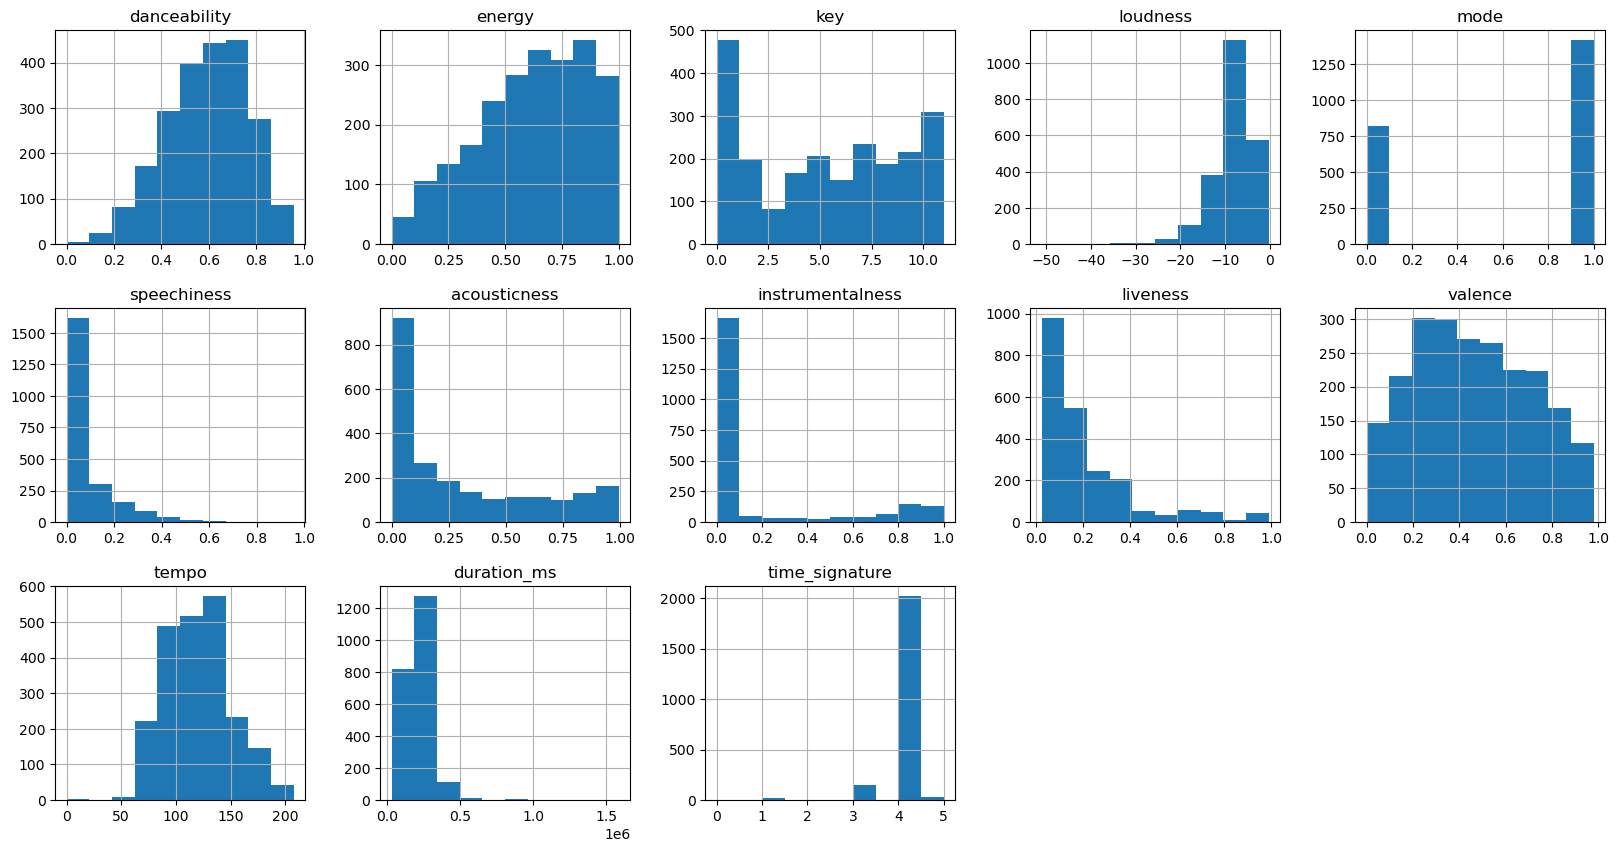

In [57]:
raw_data.hist(layout=(3, 5), figsize=(20, 10))
plt.show()

In [53]:
raw_data.corr(method="spearman")

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
danceability,1.000000,0.042468,0.035283,0.132994,-0.088240,0.266921,-0.060792,-0.147434,-0.160541,0.449685,-0.073007,-0.211640,0.152196
energy,0.042468,1.000000,0.021527,0.769590,-0.060466,0.239964,-0.687614,-0.073935,0.189409,0.291280,0.256952,0.158943,0.133896
key,0.035283,0.021527,1.000000,0.007713,-0.098854,0.037759,-0.011786,-0.003554,0.011784,0.036849,-0.009352,0.012484,0.021009
loudness,0.132994,0.769590,0.007713,1.000000,-0.020431,0.173864,-0.547912,-0.301127,0.103989,0.296508,0.197321,0.100016,0.125940
mode,-0.088240,-0.060466,-0.098854,-0.020431,1.000000,-0.101390,0.066241,-0.059090,0.004530,-0.039362,-0.010844,0.031789,-0.046381
speechiness,0.266921,0.239964,0.037759,0.173864,-0.101390,1.000000,-0.180080,-0.171900,0.052675,0.113577,0.097741,-0.207521,0.086327
acousticness,-0.060792,-0.687614,-0.011786,-0.547912,0.066241,-0.180080,1.000000,-0.010196,-0.102351,-0.116900,-0.257554,-0.137574,-0.157383
instrumentalness,-0.147434,-0.073935,-0.003554,-0.301127,-0.059090,-0.171900,-0.010196,1.000000,-0.078351,-0.256783,-0.016083,0.036933,-0.052849
liveness,-0.160541,0.189409,0.011784,0.103989,0.004530,0.052675,-0.102351,-0.078351,1.000000,0.001471,0.062902,0.015432,0.027242
valence,0.449685,0.291280,0.036849,0.296508,-0.039362,0.113577,-0.116900,-0.256783,0.001471,1.000000,0.052494,-0.075976,0.095565
